# Sprint4. Analistes del Perfil del Client: 
#### Qué diferencias hay en el comportamiento financiero entre los diferentes segmentos demográficos, i como podemos utilizar esta información para personalizar nuestras ofertas?

In [632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [633]:
#pip install scikit-learn

In [634]:
df_BANK_marketing = pd.read_csv('S4_df_BANK_marketing.csv')
df_BANK_marketing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_normalizado,estado_balance
0,1,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,0.260495,Saldo Alto
1,2,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,0.260495,Saldo Alto
2,3,56.0,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1,-0.455442,Saldo Bajo
3,4,41.0,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1,-0.073796,Saldo Medio Alto
4,5,55.0,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1,0.301931,Saldo Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,0,107,1,0,cellular,17,jul,122,17,-1,0,unknown,0,-0.436126,Saldo Bajo
39184,45764,57.0,management,married,tertiary,0,350,0,0,telephone,4,may,87,3,-1,0,unknown,0,-0.360420,Saldo Medio
39185,45765,84.0,retired,married,secondary,0,81204,0,0,telephone,28,dec,679,1,313,2,other,1,24.829468,Saldo Muy Alto
39186,45766,29.0,blue-collar,married,primary,0,544,0,1,cellular,21,jul,121,4,-1,0,unknown,0,-0.299980,Saldo Medio


In [635]:
cliente= df_BANK_marketing[['id', 'age', 'job', 'marital', 'education', 'housing', 'loan', 'deposit', 'balance']]
cliente

,id,age,job,marital,education,housing,loan,deposit,balance
0,1,59.0,admin.,married,secondary,1,0,1,2343
1,2,59.0,admin.,married,secondary,1,0,1,2343
2,3,56.0,admin.,married,secondary,0,0,1,45
3,4,41.0,technician,married,secondary,1,0,1,1270
4,5,55.0,services,married,secondary,1,0,1,2476
...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,1,0,0,107
39184,45764,57.0,management,married,tertiary,0,0,0,350
39185,45765,84.0,retired,married,secondary,0,0,1,81204
39186,45766,29.0,blue-collar,married,primary,0,1,0,544


In [636]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         39188 non-null  int64  
 1   age        39188 non-null  float64
 2   job        39188 non-null  object 
 3   marital    39188 non-null  object 
 4   education  39188 non-null  object 
 5   housing    39188 non-null  int64  
 6   loan       39188 non-null  int64  
 7   deposit    39188 non-null  int64  
 8   balance    39188 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.7+ MB


In [637]:
cliente.describe()

,id,age,housing,loan,deposit,balance
count,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000
mean,21776.979330,41.228106,0.472517,0.131112,0.471165,1506.869271
std,13954.569093,11.866142,0.499250,0.337527,0.499174,3209.820943
min,1.000000,18.000000,0.000000,0.000000,0.000000,-6847.000000
25%,9797.750000,32.000000,0.000000,0.000000,0.000000,121.000000
50%,19594.500000,39.000000,0.000000,0.000000,0.000000,549.000000
75%,35970.250000,49.000000,1.000000,0.000000,1.000000,1693.000000
max,45767.000000,95.000000,1.000000,1.000000,1.000000,81204.000000


In [638]:
cliente['housing'] = cliente['housing'].replace({1:'hipoteca'})
cliente['loan'] = cliente['loan'].replace({1:'credito'})
cliente['deposit'] = cliente['deposit'].replace({1:'deposit'})
cliente

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\2221701948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['housing'] = cliente['housing'].replace({1:'hipoteca'})
C:\Users\34622\AppData\Local\Temp\ipykernel_11132\2221701948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['loan'] = cliente['loan'].replace({1:'credito'})
C:\Users\34622\AppData\Local\Temp\ipykernel_11132\2221701948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,id,age,job,marital,education,housing,loan,deposit,balance
0,1,59.0,admin.,married,secondary,hipoteca,0,deposit,2343
1,2,59.0,admin.,married,secondary,hipoteca,0,deposit,2343
2,3,56.0,admin.,married,secondary,0,0,deposit,45
3,4,41.0,technician,married,secondary,hipoteca,0,deposit,1270
4,5,55.0,services,married,secondary,hipoteca,0,deposit,2476
...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,hipoteca,0,0,107
39184,45764,57.0,management,married,tertiary,0,0,0,350
39185,45765,84.0,retired,married,secondary,0,0,deposit,81204
39186,45766,29.0,blue-collar,married,primary,0,credito,0,544


In [639]:
cliente['housing'] = cliente['housing'].astype(str)
cliente['loan'] = cliente['loan'].astype(str)
cliente['deposit'] = cliente['deposit'].astype(str)

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\318873528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['housing'] = cliente['housing'].astype(str)
C:\Users\34622\AppData\Local\Temp\ipykernel_11132\318873528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['loan'] = cliente['loan'].astype(str)
C:\Users\34622\AppData\Local\Temp\ipykernel_11132\318873528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [640]:
cliente['producto'] = cliente['housing'] + '_' + cliente['loan'] + '_' + cliente['deposit']
cliente

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\1490837533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['producto'] = cliente['housing'] + '_' + cliente['loan'] + '_' + cliente['deposit']


,id,age,job,marital,education,housing,loan,deposit,balance,producto
0,1,59.0,admin.,married,secondary,hipoteca,0,deposit,2343,hipoteca_0_deposit
1,2,59.0,admin.,married,secondary,hipoteca,0,deposit,2343,hipoteca_0_deposit
2,3,56.0,admin.,married,secondary,0,0,deposit,45,0_0_deposit
3,4,41.0,technician,married,secondary,hipoteca,0,deposit,1270,hipoteca_0_deposit
4,5,55.0,services,married,secondary,hipoteca,0,deposit,2476,hipoteca_0_deposit
...,...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,hipoteca,0,0,107,hipoteca_0_0
39184,45764,57.0,management,married,tertiary,0,0,0,350,0_0_0
39185,45765,84.0,retired,married,secondary,0,0,deposit,81204,0_0_deposit
39186,45766,29.0,blue-collar,married,primary,0,credito,0,544,0_credito_0


In [641]:
cliente_selec = cliente[['id','age', 'job', 'marital','education', 'producto', 'balance']]
cliente_selec['producto'] = cliente_selec['producto'].str.replace('0_0_0','ninguno', regex=False)
cliente_selec['producto'] = cliente_selec['producto'].str.replace('0','', regex=False).str.strip('_')
cliente_selec

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\2299705117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente_selec['producto'] = cliente_selec['producto'].str.replace('0_0_0','ninguno', regex=False)
C:\Users\34622\AppData\Local\Temp\ipykernel_11132\2299705117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente_selec['producto'] = cliente_selec['producto'].str.replace('0','', regex=False).str.strip('_')


,id,age,job,marital,education,producto,balance
0,1,59.0,admin.,married,secondary,hipoteca__deposit,2343
1,2,59.0,admin.,married,secondary,hipoteca__deposit,2343
2,3,56.0,admin.,married,secondary,deposit,45
3,4,41.0,technician,married,secondary,hipoteca__deposit,1270
4,5,55.0,services,married,secondary,hipoteca__deposit,2476
...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,hipoteca,107
39184,45764,57.0,management,married,tertiary,ninguno,350
39185,45765,84.0,retired,married,secondary,deposit,81204
39186,45766,29.0,blue-collar,married,primary,credito,544


In [642]:
cliente_selec['producto'].unique()

array(['hipoteca__deposit', 'deposit', 'hipoteca_credito_deposit',
       'credito_deposit', 'ninguno', 'hipoteca', 'hipoteca_credito',
       'credito'], dtype=object)

In [643]:
def codificacion_producto(row):
    if row['producto'] == 'ninguno':
        return 0
    elif row['producto'] == 'hipoteca':
        return 1
    elif row['producto'] == 'deposit':
        return 1
    elif row['producto'] == 'credito':
        return 1
    elif row['producto'] == 'hipoteca__deposit':
        return 2
    elif row['producto'] == 'hipoteca_credito':
        return 2    
    elif row['producto'] == 'credito_deposit':
        return 2 
    
    else: return 3;
    

#Ejecuto la función con .apply()
cliente_selec['producto'] = cliente_selec.apply(codificacion_producto, axis=1)

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\2339954715.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente_selec['producto'] = cliente_selec.apply(codificacion_producto, axis=1)


In [644]:
cliente_selec

,id,age,job,marital,education,producto,balance
0,1,59.0,admin.,married,secondary,2,2343
1,2,59.0,admin.,married,secondary,2,2343
2,3,56.0,admin.,married,secondary,1,45
3,4,41.0,technician,married,secondary,2,1270
4,5,55.0,services,married,secondary,2,2476
...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,1,107
39184,45764,57.0,management,married,tertiary,0,350
39185,45765,84.0,retired,married,secondary,1,81204
39186,45766,29.0,blue-collar,married,primary,1,544


In [645]:
cliente_selec['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [646]:
def codificacion_job(row):
    if row['job'] in ('admin.', 'technician', 'management','blue-collar'):
        return 3 # trabajo cualificado altp
    elif row['job'] in ('services', 'entrepreneur', 'self-employed'):
        return 2 #cualificado_medio
    elif row['job'] in ('housemaid','unknown'):
        return 1 #cualificado bajo
    else:
        return 0; #no_trabajan
    

#Ejecuto la función con .apply()
cliente_selec['job'] = cliente_selec.apply(codificacion_job, axis=1)

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\1453926397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente_selec['job'] = cliente_selec.apply(codificacion_job, axis=1)


In [647]:
cliente_selec['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [648]:
def codificacion_edu(row):
    if row['education'] in ('tertiary'):
        return 3 # edu terciary
    elif row['education'] in ('secondary'):
        return 2 #edu secondary
    elif row['education'] in ('primary'):
        return 1 #edu primary
    else:
        return 0; #unkown
    

#Ejecuto la función con .apply()
cliente_selec['education'] = cliente_selec.apply(codificacion_edu, axis=1)

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\635038472.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente_selec['education'] = cliente_selec.apply(codificacion_edu, axis=1)


In [649]:
cliente_selec

,id,age,job,marital,education,producto,balance
0,1,59.0,3,married,2,2,2343
1,2,59.0,3,married,2,2,2343
2,3,56.0,3,married,2,1,45
3,4,41.0,3,married,2,2,1270
4,5,55.0,2,married,2,2,2476
...,...,...,...,...,...,...,...
39183,45763,41.0,3,divorced,3,1,107
39184,45764,57.0,3,married,3,0,350
39185,45765,84.0,0,married,2,1,81204
39186,45766,29.0,3,married,1,1,544


In [650]:
cliente_selec['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [651]:
def codificacion_marital(row):
    if row['marital'] in ('married'):
        return 2 # casado
    elif row['marital'] in ('single'):
        return 1 #single
    else:
        return 0; #divorded
    

#Ejecuto la función con .apply()
cliente_selec['marital'] = cliente_selec.apply(codificacion_marital, axis=1)

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\4020193969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente_selec['marital'] = cliente_selec.apply(codificacion_marital, axis=1)


In [652]:
cliente_selec = cliente_selec[['age','job','marital','education','balance']]

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\2464306497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cliente_selec, y='balance', palette='inferno')


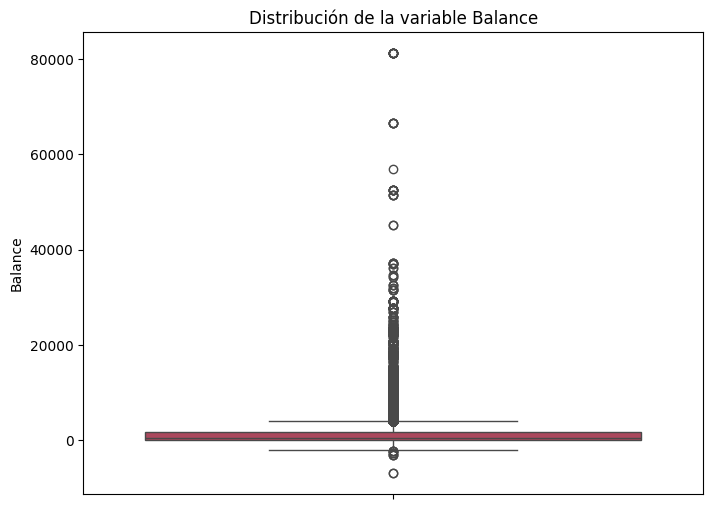

In [653]:
# Gráfico de caja para la distribución de Balance
plt.figure(figsize=(8, 6))
sns.boxplot(data=cliente_selec, y='balance', palette='inferno')
plt.ylabel('Balance')
plt.title('Distribución de la variable Balance')
plt.show()

# Elección del número de Clústers.
## Método de Silhouette Score

In [654]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [655]:
data = cliente_selec

In [656]:
def silhouette(data, max_clusters=10):
    """
    Función para seleccionar el número óptimo de clusters utilizando el coeficiente de Silhouette.
    Parámetros:
    -----------
    data : matriz o matriz dispersa, forma (n_samples, n_features)
        Los datos de entrada.
    max_clusters : int, opcional (por defecto=10)
        El número máximo de clusters a considerar.
    Retorna:
    -------
    best_k : int
        El número óptimo de clusters seleccionado por el método de Silhouette
    """
    silhouette_scores = []  # Lista para almacenar los coeficientes de Silhouette
    # Iterar sobre los valores de k
    for k in range(2, max_clusters + 1):
        # Crear un modelo de KMeans con el número de clusters k
        kmeans = KMeans(n_clusters=k)
        # Ajustar el modelo a los datos y obtener las etiquetas de los clusters
        labels = kmeans.fit_predict(data)
        # Calcular el coeficiente de Silhouette para el modelo
        silhouette_avg = silhouette_score(data, labels)
        # Agregar el coeficiente a la lista
        silhouette_scores.append(silhouette_avg)
    # Encontrar el valor de k con el coeficiente de Silhouette más alto
    best_k = 2 + silhouette_scores.index(max(silhouette_scores))
    return best_k


In [657]:
from sklearn.datasets import make_blobs
# Genera un conjunto de datos de ejemplo con 6 clusters
data, _ = make_blobs(n_samples=500, centers=6, n_features=2, random_state=42)
silhouette(data)

4

# Clustering KMeans

In [658]:
print(cliente_selec.columns)

Index(['age', 'job', 'marital', 'education', 'balance'], dtype='object')


## 1. Normalizar

In [659]:
escalador = MinMaxScaler()
data_escalada = escalador.fit_transform(cliente_selec[['age', 'job','marital','education','balance']])
data_escalada

array([[0.53246753, 1.        , 1.        , 0.66666667, 0.10437133],
       [0.53246753, 1.        , 1.        , 0.66666667, 0.10437133],
       [0.49350649, 1.        , 1.        , 0.66666667, 0.07827282],
       ...,
       [0.85714286, 0.        , 1.        , 0.66666667, 1.        ],
       [0.14285714, 1.        , 1.        , 0.33333333, 0.08393999],
       [0.20779221, 1.        , 1.        , 0.66666667, 0.07776175]])

## 2. Reducción de las Dimensiones: PCA

In [660]:
# Aplicar PCA
pca = PCA(n_components = 2)
pca_resultados = pca.fit_transform(data_escalada)
pca_resultados

array([[ 0.14146182,  0.30450668],
       [ 0.14146182,  0.30450668],
       [ 0.14796918,  0.30135976],
       ...,
       [-0.85221889,  0.27659062],
       [ 0.10235838,  0.31657083],
       [ 0.19488811,  0.27893164]])

## 3. Clustering: KMeans

In [661]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state =42)
kmeans_clusters = kmeans.fit_predict(data_escalada)

In [662]:
centroides = kmeans.cluster_centers_
centroides

array([[0.31299557, 0.93948322, 1.        , 0.69859467, 0.09471722],
       [0.29040681, 0.04518002, 0.33763066, 0.61614402, 0.09447287],
       [0.23645097, 0.94279756, 0.37214758, 0.76292031, 0.09315892],
       [0.5076132 , 0.08072917, 1.        , 0.55106027, 0.10275815]])

In [663]:
pca = PCA(n_components = 2)
pca_resultados_centroides = pca.fit_transform(centroides)
pca_resultados_centroides

array([[ 0.44210453,  0.3177641 ],
       [-0.45152556, -0.35098749],
       [ 0.45712681, -0.31397019],
       [-0.44770578,  0.34719358]])

In [664]:
# Imprimir los centroides
print("Centroides de cada clúster:")
print(pca_resultados_centroides, kmeans.inertia_)

Centroides de cada clúster:
[[ 0.44210453  0.3177641 ]
 [-0.45152556 -0.35098749]
 [ 0.45712681 -0.31397019]
 [-0.44770578  0.34719358]] 4855.632692539673


## 4. Visualización de datos

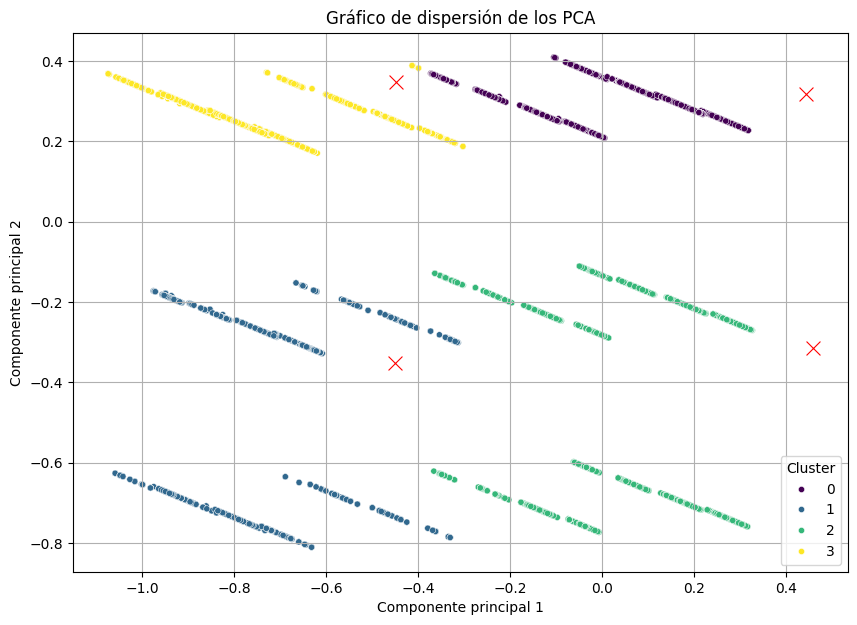

In [665]:
# Crear un gráfico de dispersión para los resultadosde PCA
plt.figure(figsize=(10,7))
sns.scatterplot(x = pca_resultados[:,0], y=pca_resultados[:,1], hue = kmeans_clusters,palette = 'viridis',s=20)
sns.scatterplot(x = pca_resultados_centroides[:,0], y=pca_resultados_centroides[:,1],  color= 'red', marker = 'x', s=100)
plt.title('Gráfico de dispersión de los PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title ='Cluster')
plt.grid(True)

## Resultados de los clusters

 En K-means, los centroides son los promedios de todas las características (o parámetros) de los puntos dentro de cada clúster. Por lo tanto, el cálculo de los centroides en K-means es efectivamente el cálculo de las medias de cada parámetro (edad, balance, etc.) para cada clúster.

In [666]:
# Escribe un loop que te permita mostrar los datos básicos de cada clústers, como:
## su edad media
## sus ingresos medios
##su puntuación de gastos media

# Análisis de clústers para determinar estrategias 
cluster_info = pd.DataFrame({'Cluster':kmeans_clusters,
                            'Edad': cliente_selec['age'],
                            'Trabajo': cliente_selec['job'],
                            'Educacion': cliente_selec['education'],
                            'Marital': cliente_selec['marital'],
                            'Balance':cliente_selec['balance']})
for cluster in cluster_info['Cluster'].unique():
    cluster_data = cluster_info[cluster_info['Cluster'] == cluster]

    print(f"Cluster {cluster}:")
    print(f" - Edad Media: {cluster_data['Edad'].mean():.0f}")
    print(f" - Trabajo: {cluster_data['Trabajo'].mean():.0f}")
    print(f" - Marital: {cluster_data['Marital'].mean():.0f}")
    print(f" - Educación: {cluster_data['Educacion'].mean():.0f}")
    #print(f" - Producto: {cluster_data['Producto'].mean():.0f}")
    print(f" - Balance: {cluster_data['Balance'].mean():.2f}")


Cluster 0:
 - Edad Media: 42
 - Trabajo: 3
 - Marital: 2
 - Educación: 2
 - Balance: 1492.95
Cluster 2:
 - Edad Media: 36
 - Trabajo: 3
 - Marital: 1
 - Educación: 2
 - Balance: 1355.74
Cluster 1:
 - Edad Media: 40
 - Trabajo: 0
 - Marital: 1
 - Educación: 2
 - Balance: 1471.43
Cluster 3:
 - Edad Media: 57
 - Trabajo: 0
 - Marital: 2
 - Educación: 2
 - Balance: 2200.96


#### Visualizaciones

In [686]:
# Agrupar los datos por clúster y calcular promedios
clusters_data = cluster_info.groupby('Cluster').mean().reset_index()

# Revisar los datos
print(round(clusters_data, 0))

   Cluster  Edad  Trabajo  Educacion  Marital  Balance
0        0  42.0      3.0        2.0      2.0   1493.0
1        1  40.0      0.0        2.0      1.0   1471.0
2        2  36.0      3.0        2.0      1.0   1356.0
3        3  57.0      0.0        2.0      2.0   2201.0


In [687]:
colors = ['#deebf7', '#9ecae1', '#4292c6', '#08519c']

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\1009332055.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_clusters, x='Cluster', y='Balance', palette='Blues', ci=None)
C:\Users\34622\AppData\Local\Temp\ipykernel_11132\1009332055.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_clusters, x='Cluster', y='Balance', palette='Blues', ci=None)


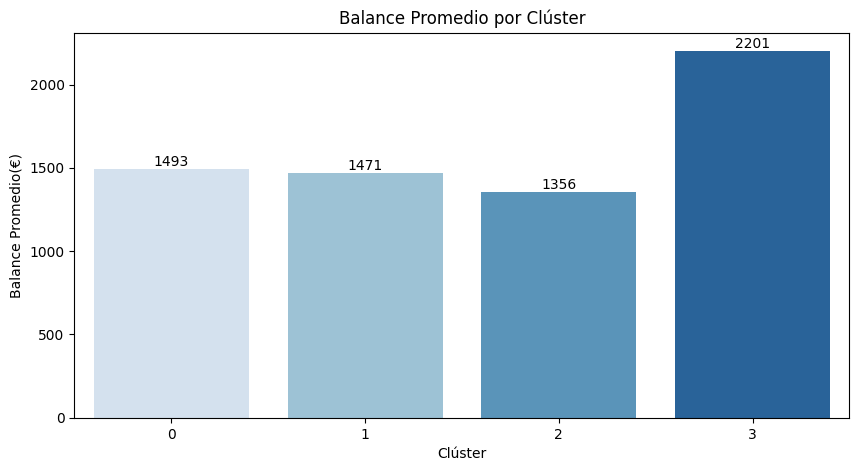

In [669]:
df_clusters = pd.DataFrame(clusters_data)

# Gráficos
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_clusters, x='Cluster', y='Balance', palette='Blues', ci=None)
ax.bar_label(ax.containers[0], fmt='%.0f')
ax.bar_label(ax.containers[1], fmt='%.0f')
ax.bar_label(ax.containers[2], fmt='%.0f')
ax.bar_label(ax.containers[3], fmt='%.0f')
plt.xlabel('Clúster')
plt.ylabel('Balance Promedio(€)')
plt.title('Balance Promedio por Clúster')
plt.xticks(df_clusters['Cluster'])
plt.show()

### Gráfico de cajas BOXPLOT

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\3517416207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cluster_info, x='Cluster', y='Balance', palette='inferno')


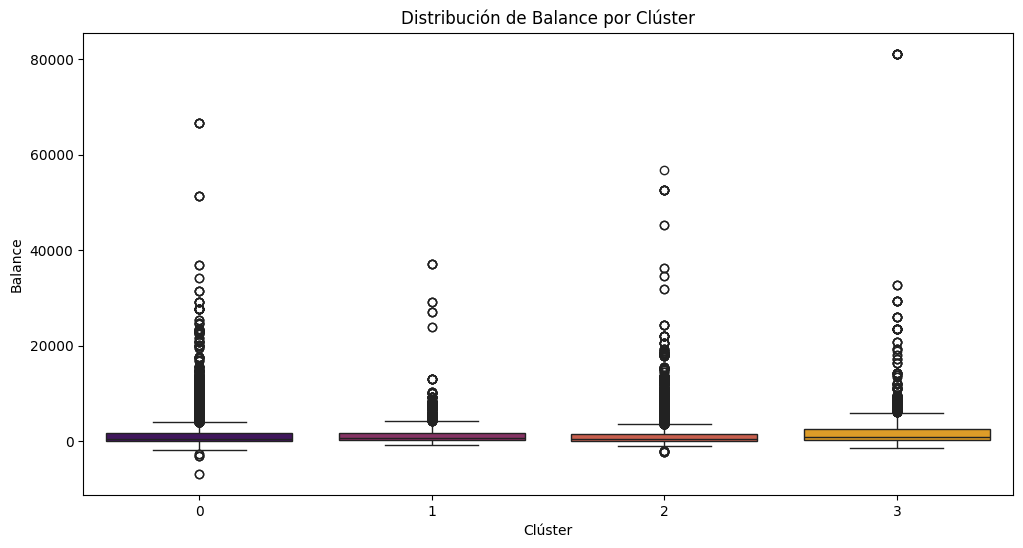

In [690]:
# Gráfico de caja para cada clúster y su Balance
plt.figure(figsize=(12, 6))
sns.boxplot(data=cluster_info, x='Cluster', y='Balance', palette='inferno')
plt.xlabel('Clúster')
plt.ylabel('Balance')
plt.title('Distribución de Balance por Clúster')
plt.show()

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\1198048112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cluster_info, x='Cluster', y='Edad', palette='Blues')


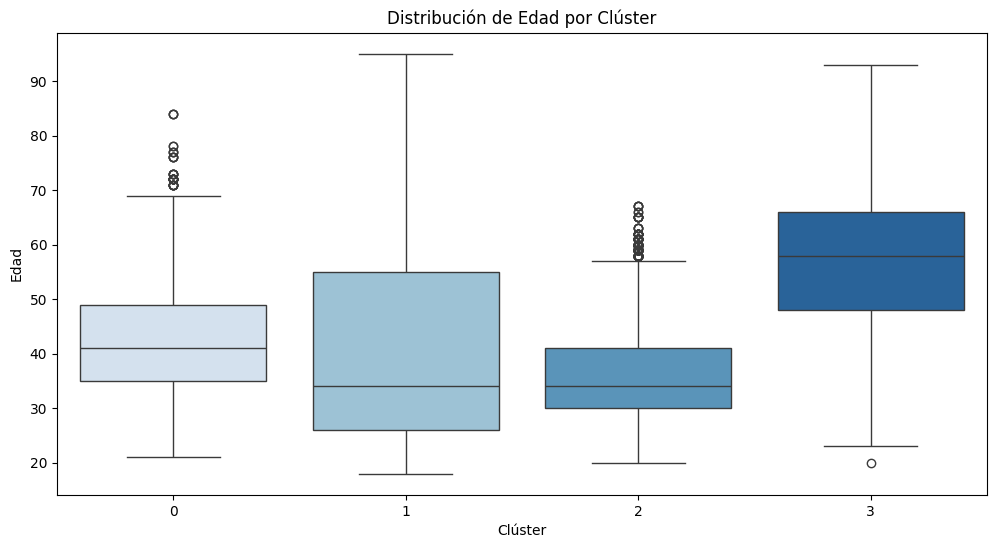

In [691]:
# Gráfico de caja para cada Cluster y su Edad
plt.figure(figsize=(12, 6))
sns.boxplot(data=cluster_info, x='Cluster', y='Edad', palette='Blues')
plt.xlabel('Clúster')
plt.ylabel('Edad')
plt.title('Distribución de Edad por Clúster')
plt.show()

### Gráfico de dispersión

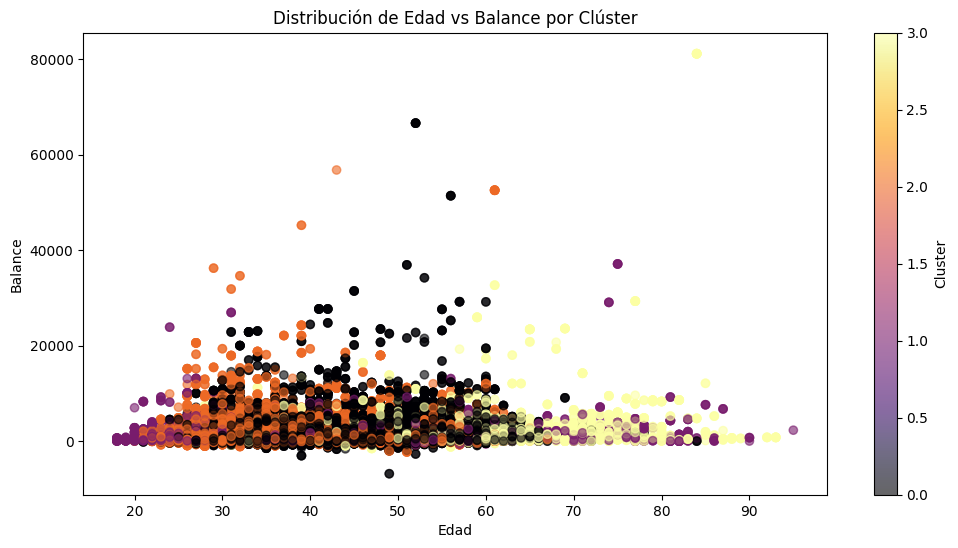

In [692]:
# Gráfico de dispersión entre Edad y Balance
plt.figure(figsize=(12, 6))
plt.scatter(cluster_info['Edad'], cluster_info['Balance'], c=cluster_info['Cluster'], cmap='inferno', alpha=0.6)
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.title('Distribución de Edad vs Balance por Clúster')
plt.colorbar(label='Cluster')
plt.show()

In [693]:
cluster_info

,Cluster,Edad,Trabajo,Educacion,Marital,Balance
0,0,59.0,3,2,2,2343
1,0,59.0,3,2,2,2343
2,0,56.0,3,2,2,45
3,0,41.0,3,2,2,1270
4,0,55.0,2,2,2,2476
...,...,...,...,...,...,...
39183,2,41.0,3,3,0,107
39184,0,57.0,3,3,2,350
39185,3,84.0,0,2,2,81204
39186,0,29.0,3,1,2,544


### Gráfico de Barras Apiladas
Un gráfico de barras apiladas es útil para comparar proporciones dentro de cada clúster.

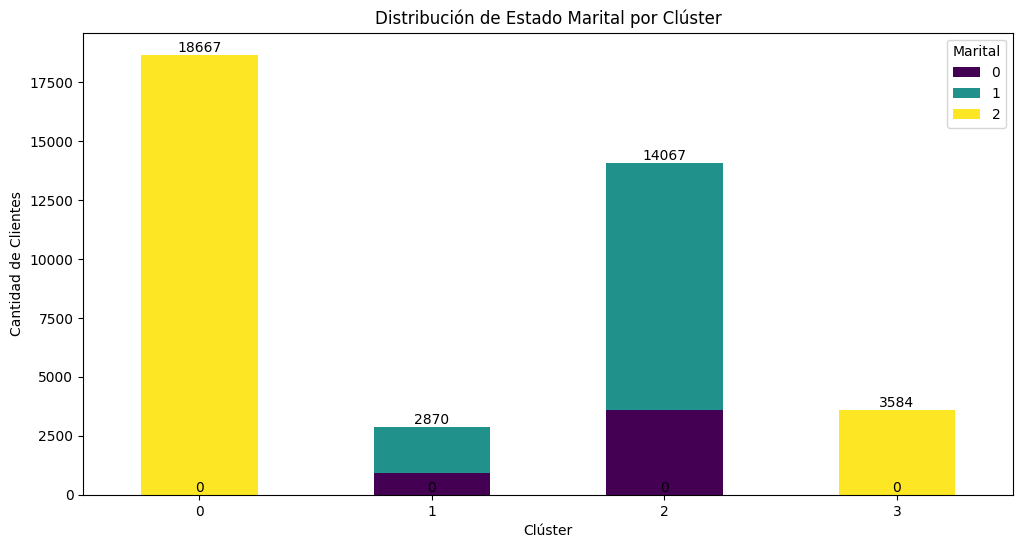

In [701]:
# Crear una tabla de distribución de Marital por Cluster
marital_dist = pd.crosstab(cluster_info['Cluster'], cluster_info['Marital'])

# Gráfico de barras apiladas
ax = marital_dist.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
ax.bar_label(ax.containers[1], fmt='%.0f')
ax.bar_label(ax.containers[2], fmt='%.0f')

plt.xlabel('Clúster')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Estado Marital por Clúster')
plt.xticks(rotation=0)
plt.show()

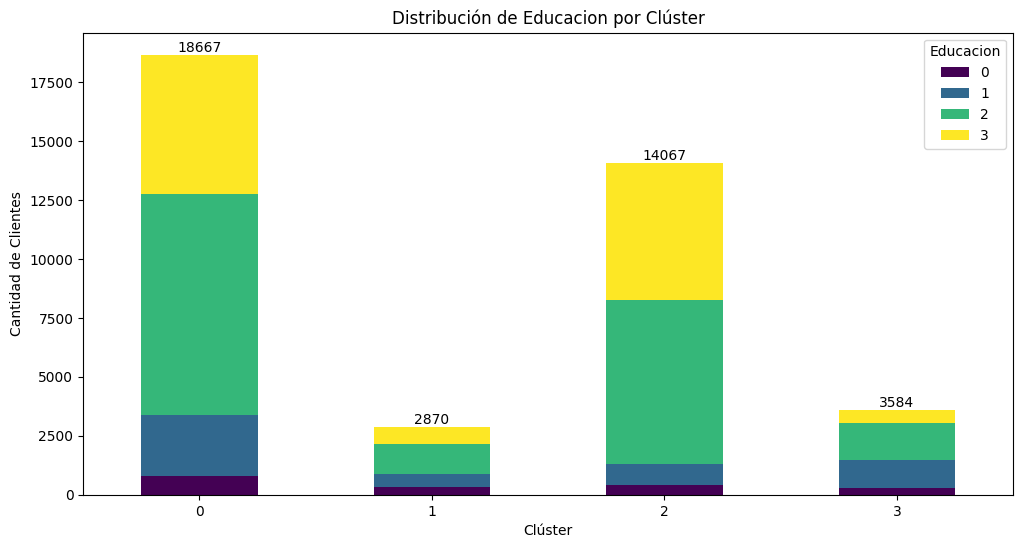

In [703]:
# Crear una tabla de distribución de Educación por Cluster
educacion_dist = pd.crosstab(cluster_info['Cluster'], cluster_info['Educacion'])

# Gráfico de barras apiladas
ax = educacion_dist.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
ax.bar_label(ax.containers[3], fmt='%.0f')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Educacion por Clúster')
plt.xticks(rotation=0)
plt.show()

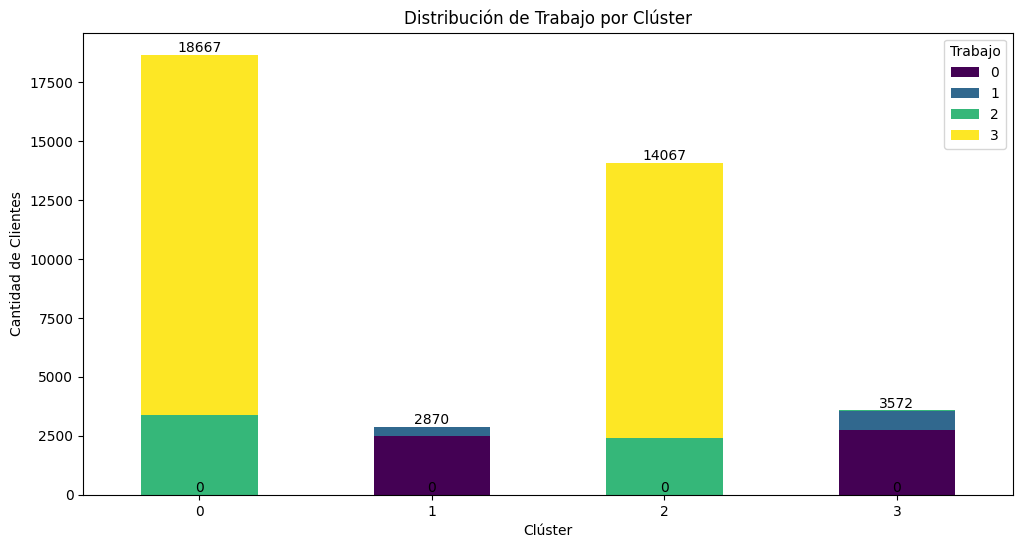

In [704]:
# Crear una tabla de distribución de Trabajo por Cluster
job_dist = pd.crosstab(cluster_info['Cluster'], cluster_info['Trabajo'])

# Gráfico de barras apiladas
ax=job_dist.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
ax.bar_label(ax.containers[1], fmt='%.0f')
ax.bar_label(ax.containers[3], fmt='%.0f')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Trabajo por Clúster')
plt.xticks(rotation=0)
plt.show()

### Matriz de Correlación (Heatmap)
Un heatmap es útil para visualizar las correlaciones entre diferentes variables numéricas. Puedes usarlo para ver si hay relaciones fuertes entre características dentro de cada clúster.

Facilita la visualización de relaciones entre variables.
Detecta correlaciones fuertes o débiles entre características.

In [677]:
cluster_info.columns

Index(['Cluster', 'Edad', 'Trabajo', 'Educacion', 'Marital', 'Balance'], dtype='object')

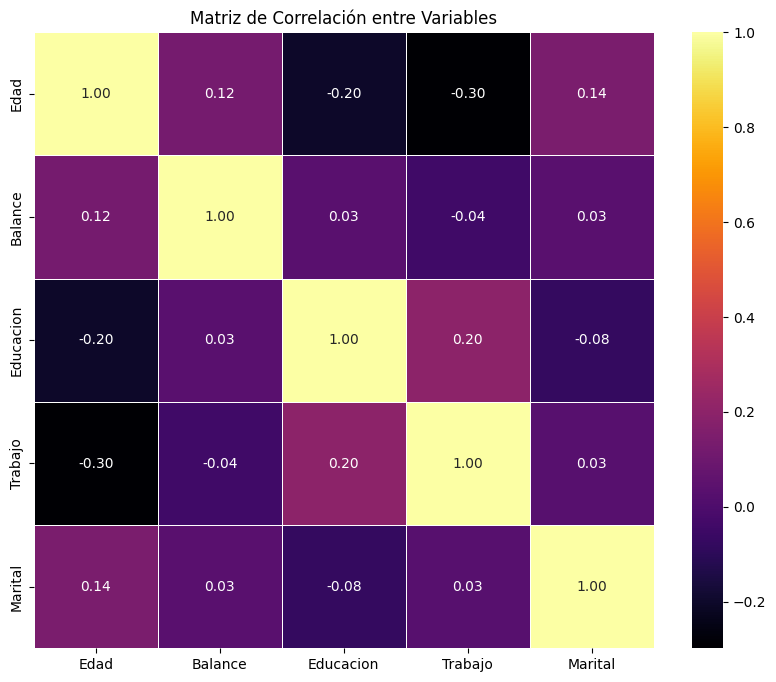

In [678]:
# Calcular la matriz de correlación
corr_matrix = cluster_info[['Edad', 'Balance', 'Educacion', 'Trabajo', 'Marital']].corr()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

### Gráfico de Densidad (KDE)
Un gráfico de densidad es útil para ver la distribución de una variable continua. Puedes usarlo para ver cómo se distribuye la edad o el balance dentro de cada clúster.

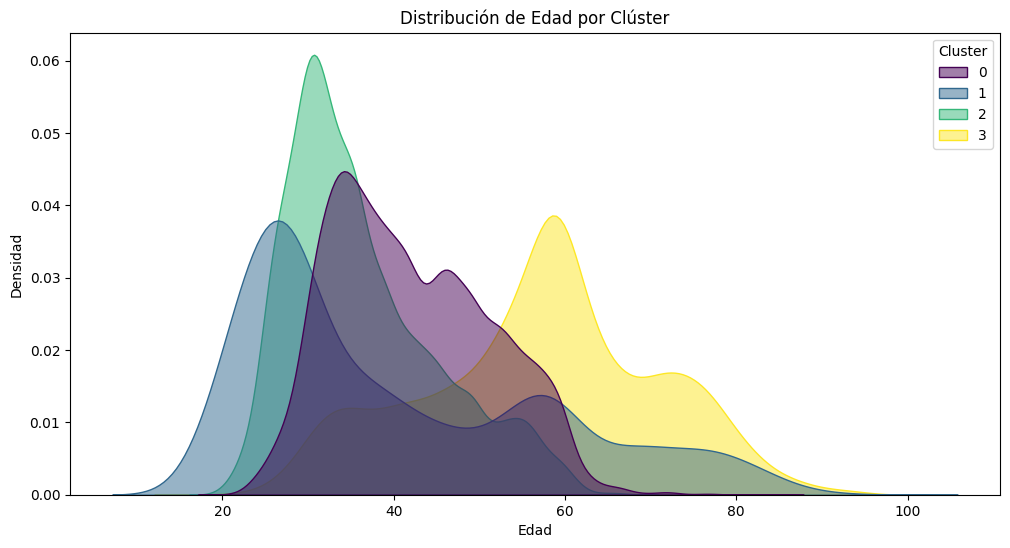

In [679]:
# Crear el gráfico KDE para la Edad por Clúster
plt.figure(figsize=(12, 6))
sns.kdeplot(data=cluster_info, x='Edad', hue='Cluster', fill=True, common_norm=False, palette='viridis', alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribución de Edad por Clúster')
plt.show()

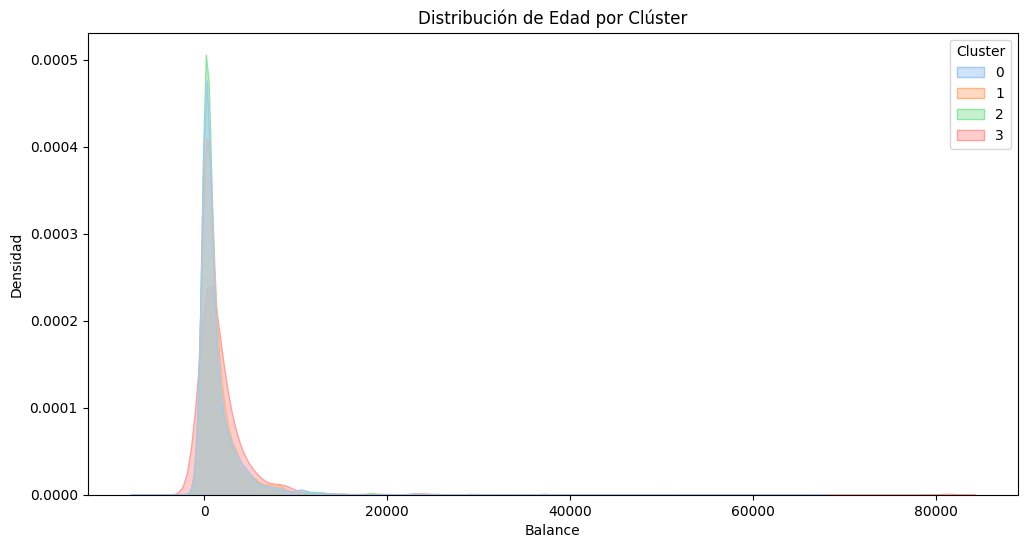

In [680]:
# Crear el gráfico KDE para la Balance por Clúster
plt.figure(figsize=(12, 6))
sns.kdeplot(data=cluster_info, x='Balance', hue='Cluster', fill=True, common_norm=False, palette='pastel', alpha=0.5)
plt.xlabel('Balance')
plt.ylabel('Densidad')
plt.title('Distribución de Edad por Clúster')
plt.show()

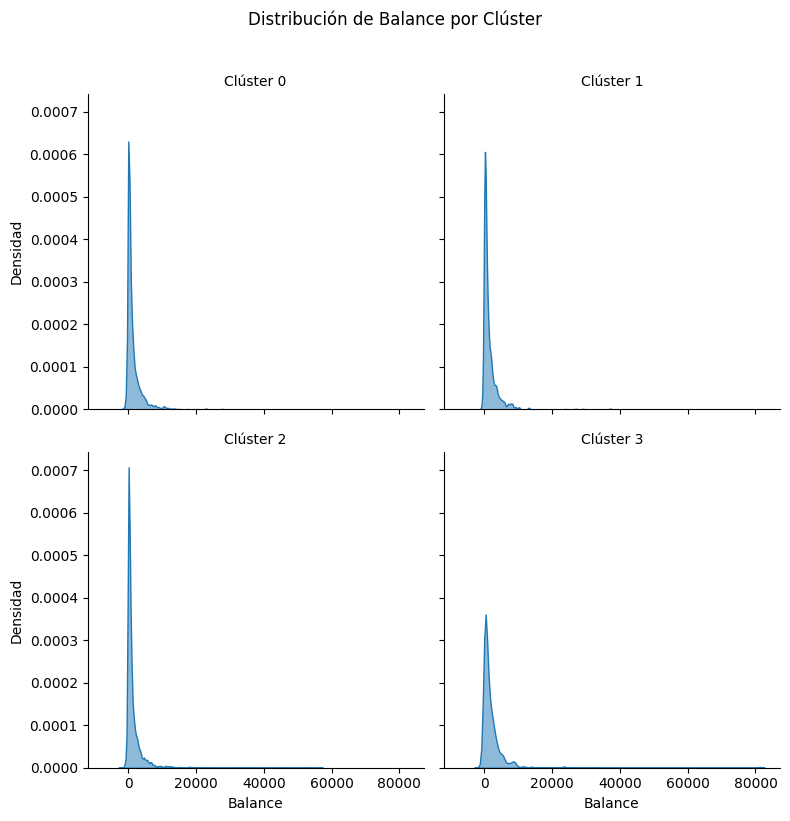

In [681]:
# Crear el FacetGrid para dividir el gráfico por clúster
g = sns.FacetGrid(cluster_info, col='Cluster', col_wrap=2, height=4, sharex=True, sharey=True, palette='inferno')
g.map(sns.kdeplot, 'Balance', fill=True, alpha=0.5, bw_adjust=0.5)

# Ajustar etiquetas y título general
g.set_axis_labels("Balance", "Densidad")
g.set_titles("Clúster {col_name}")
g.fig.suptitle("Distribución de Balance por Clúster", y=1.02)
plt.tight_layout()
plt.show()

### Gráfico de Puntos (Dot Plot)
Un gráfico de puntos es otra manera de mostrar la relación entre dos variables categóricas o continuas, pero con mayor énfasis en la distribución de los puntos.

C:\Users\34622\AppData\Local\Temp\ipykernel_11132\1144884208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=cluster_info, x='Cluster', y='Balance', jitter=True, palette='inferno', alpha=0.6)


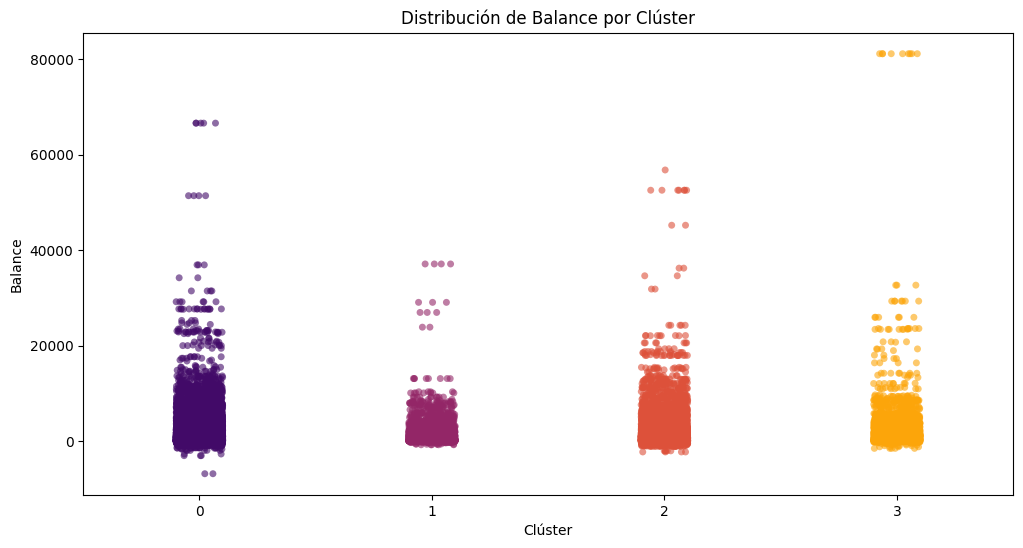

In [682]:
# Crear gráfico de puntos
plt.figure(figsize=(12, 6))
sns.stripplot(data=cluster_info, x='Cluster', y='Balance', jitter=True, palette='inferno', alpha=0.6)
plt.xlabel('Clúster')
plt.ylabel('Balance')
plt.title('Distribución de Balance por Clúster')
plt.show()